Number of intersections: 168


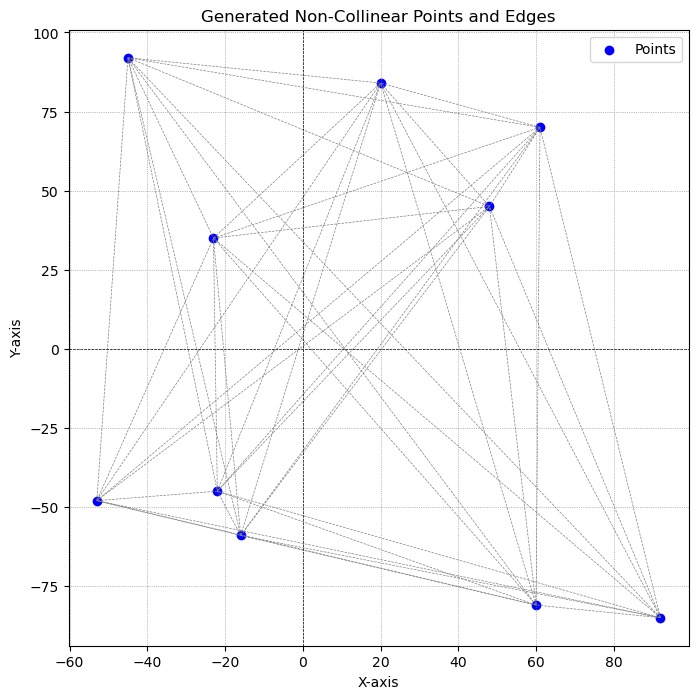

In [90]:
import random
import matplotlib.pyplot as plt

# check if two segment intersect 
def onSegment(p, q, r): 
    if ( (q[0] <= max(p[0], r[0])) and (q[0] >= min(p[0], r[0])) and 
           (q[1] <= max(p[1], r[1])) and (q[1] >= min(p[1], r[1]))): 
        return True
    return False
  
def orientation(p, q, r): 
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if (val > 0): 
        return 1
    elif (val < 0): 
        return 2
    else: 
        return 0
  
def doIntersect(p1, q1, p2, q2): 
    # Find orientations
    o1 = orientation(p1, q1, p2) 
    o2 = orientation(p1, q1, q2) 
    o3 = orientation(p2, q2, p1) 
    o4 = orientation(p2, q2, q1) 
    # General case 
    if ((o1 != o2) and (o3 != o4)): 
        return True
    return False
# end of intersect functions 

def generate_non_collinear_points(n, min_val=-100, max_val=100):
    points = []
    while len(points) < n:
        x, y = random.randint(min_val, max_val), random.randint(min_val, max_val)
        # Temporarily add the new point
        temp_points = points + [(x, y)]
        if len(temp_points) < 3 or not are_more_than_three_collinear(temp_points):  
            points.append((x, y))
    return points

def are_more_than_three_collinear(points): # if 3 points are collinear, then it must have the same slope 
    n = len(points)
    for i in range(n):
        slopes = {}
        for j in range(n):
            if i != j:
                dx = points[j][0] - points[i][0]
                dy = points[j][1] - points[i][1]
                if dx == 0:
                    s = float('inf')  # Represent vertical slope
                else:
                    s = dy / dx
                slopes[s] = slopes.get(s, 0) + 1
        if any(count >= 2 for count in slopes.values()):
            return True
    return False

#BF to find all the edges with a given set of points 
def find_all_edges(points):
    edges = []
    n = len(points)
    for i in range(n):
        for j in range(i + 1, n):
            edges.append((points[i], points[j]))
    return edges

# graph plotting 
def plot_points_and_edges(points, edges):
    x_coords = [p[0] for p in points]
    y_coords = [p[1] for p in points]
    
    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords, y_coords, color='blue', label='Points')
    
    for edge in edges:
        x_vals = [edge[0][0], edge[1][0]]
        y_vals = [edge[0][1], edge[1][1]]
        plt.plot(x_vals, y_vals, color='gray', linestyle='--', linewidth=0.5)
    
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.grid(color='gray', linestyle=':', linewidth=0.5)
    plt.title('Generated Non-Collinear Points and Edges')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.show()

# Generate points
points = generate_non_collinear_points(10)
edges = find_all_edges(points)

# Count crossings (excluding shared vertices)
c = 0
for i in range(len(edges)):
    for j in range(i + 1, len(edges)): 
        p1, q1 = edges[i]
        p2, q2 = edges[j]
        # Skip if the edges share a vertex
        if len(set([p1, q1, p2, q2])) < 4: # a set cannot have duplicates, so it can check if two edges contains the same vertex 
            continue
        if doIntersect(p1, q1, p2, q2):
            c += 1

print(f"Number of intersections: {c}")

# Plot the points and edges
plot_points_and_edges(points, edges)


[(-16, -59), (92, -85), (61, 70), (60, -81), (-45, 92), (-22, -45), (-23, 35), (-53, -48), (20, 84), (48, 45)]
[((-16, -59), (-45, 92)), ((-16, -59), (48, 45)), ((92, -85), (-53, -48)), ((92, -85), (20, 84)), ((61, 70), (-23, 35)), ((61, 70), (48, 45)), ((60, -81), (-22, -45)), ((60, -81), (48, 45)), ((-45, 92), (48, 45)), ((-22, -45), (-23, 35)), ((-53, -48), (20, 84))]


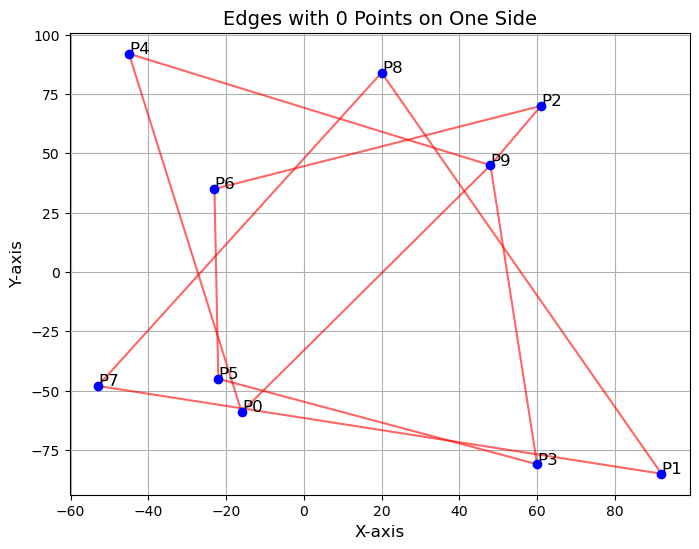

In [91]:
def find_edges_with_n_points(points, n):
    edges = []
    m = len(points)

    # Generate all possible edges
    for i in range(m):
        for j in range(i + 1, m):
            pi, pj = points[i], points[j]
            side_counts = [0, 0]  # [points on one side, points on the other side]

            for k in range(m):
                if k == i or k == j:
                    continue

                pk = points[k]
                cross_product = (pk[0] - pi[0]) * (pj[1] - pi[1]) - (pk[1] - pi[1]) * (pj[0] - pi[0])

                if cross_product > 0:
                    side_counts[0] += 1  # Point on one side
                elif cross_product < 0:
                    side_counts[1] += 1  # Point on the other side

            # Check if exactly n points are on one side
            if side_counts[0] == n or side_counts[1] == n:
                edges.append((pi, pj))

    return edges



print(points)
edges = find_edges_with_n_points(points, 2)
print(edges)

plt.figure(figsize=(8, 6))

# Plot edges
for edge in edges:
    pi, pj = edge
    x_values = [pi[0], pj[0]]
    y_values = [pi[1], pj[1]]
    plt.plot(x_values, y_values, 'r-', alpha=0.6, label="Edge with 0 points on one side")

# Plot points
for i, point in enumerate(points):
    plt.scatter(*point, color='blue', zorder=5)
    plt.text(point[0] + 0.1, point[1] + 0.1, f'P{i}', fontsize=12)

# Style the plot
plt.title('Edges with 0 Points on One Side', fontsize=14)
plt.xlabel('X-axis', fontsize=12)
plt.ylabel('Y-axis', fontsize=12)
plt.grid(True)
plt.show()


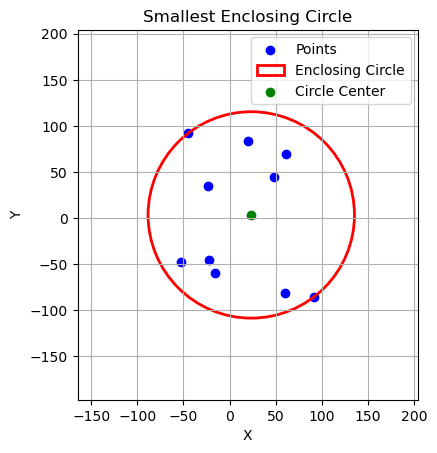

Number 0th:  [(-53, -48), (-45, 92), (-23, 35), (-22, -45), (-16, -59), (20, 84), (48, 45), (60, -81), (61, 70), (92, -85)]
Number 1th:  [(-53, -48), (-45, 92), (-22, -45), (-23, 35), (-16, -59), (20, 84), (48, 45), (60, -81), (61, 70), (92, -85)]
Number 2th:  [(-53, -48), (-45, 92), (-22, -45), (-16, -59), (-23, 35), (20, 84), (48, 45), (60, -81), (61, 70), (92, -85)]
Number 3th:  [(-53, -48), (-45, 92), (-22, -45), (-16, -59), (-23, 35), (20, 84), (60, -81), (48, 45), (61, 70), (92, -85)]
Number 4th:  [(-53, -48), (-22, -45), (-45, 92), (-16, -59), (-23, 35), (20, 84), (60, -81), (48, 45), (61, 70), (92, -85)]
Number 5th:  [(-53, -48), (-22, -45), (-16, -59), (-45, 92), (-23, 35), (20, 84), (60, -81), (48, 45), (61, 70), (92, -85)]
Number 6th:  [(-53, -48), (-22, -45), (-16, -59), (-45, 92), (-23, 35), (20, 84), (60, -81), (48, 45), (92, -85), (61, 70)]
Number 7th:  [(-53, -48), (-22, -45), (-16, -59), (-45, 92), (-23, 35), (60, -81), (20, 84), (48, 45), (92, -85), (61, 70)]
Number 8

In [92]:
import math
import random

def dist(point1, point2):
    """Calculate the Euclidean distance between two points."""
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

def circle_from_three_points(p1, p2, p3):
    """Find the circle defined by three points."""
    ax, ay = p1
    bx, by = p2
    cx, cy = p3
    
    d = 2 * (ax * (by - cy) + bx * (cy - ay) + cx * (ay - by))
    if d == 0:
        return None  # Points are collinear, no circle
    
    ux = ((ax**2 + ay**2) * (by - cy) + (bx**2 + by**2) * (cy - ay) + (cx**2 + cy**2) * (ay - by)) / d
    uy = ((ax**2 + ay**2) * (cx - bx) + (bx**2 + by**2) * (ax - cx) + (cx**2 + cy**2) * (bx - ax)) / d
    center = (ux, uy)
    radius = dist(center, p1)
    return center, radius

def circle_from_two_points(p1, p2):
    """Find the circle defined by two points (diameter endpoints)."""
    cx = (p1[0] + p2[0]) / 2
    cy = (p1[1] + p2[1]) / 2
    center = (cx, cy)
    radius = dist(center, p1)
    return center, radius

def is_point_in_circle(point, circle):
    """Check if a point lies inside or on the boundary of a circle."""
    center, radius = circle
    return dist(point, center) <= radius + 1e-9

def welzl(points, boundary=[]):
    """Welzl's algorithm to find the smallest enclosing circle."""
    if not points or len(boundary) == 3:
        if len(boundary) == 0:
            return ((0, 0), 0)
        elif len(boundary) == 1:
            return (boundary[0], 0)
        elif len(boundary) == 2:
            return circle_from_two_points(boundary[0], boundary[1])
        elif len(boundary) == 3:
            return circle_from_three_points(boundary[0], boundary[1], boundary[2])

    # Remove a random point
    p = points.pop()
    circle = welzl(points, boundary)

    if is_point_in_circle(p, circle):
        points.append(p)
        return circle

    boundary.append(p)
    circle = welzl(points, boundary)
    boundary.pop()
    points.append(p)
    return circle

def find_minimum_enclosing_circle(points):
    """Wrapper function to find the minimum enclosing circle."""
    shuffled_points = points[:]
    random.shuffle(shuffled_points)
    return welzl(shuffled_points)

# Function to plot the points and circle
def plot_circle_and_points(points, center, radius):
    # Plot points
    x_points, y_points = zip(*points)
    plt.scatter(x_points, y_points, color='blue', label='Points')
    
    # Plot circle
    circle = plt.Circle(center, radius, color='red', fill=False, linewidth=2, label='Enclosing Circle')
    plt.gca().add_artist(circle)
    
    # Plot center
    plt.scatter(*center, color='green', label='Circle Center')
    
    # Set plot limits
    plt.gca().set_aspect('equal', adjustable='box')
    plt.xlim(min(x_points) - radius, max(x_points) + radius)
    plt.ylim(min(y_points) - radius, max(y_points) + radius)
    
    # Add labels and legend
    plt.title('Smallest Enclosing Circle')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Compute minimum enclosing circle
center, radius = find_minimum_enclosing_circle(points)

# Plot the result
plot_circle_and_points(points, center, radius)

import math

def project_point_on_line(point, line_angle, center):
    """Project a point onto a line given by an angle and center."""
    px, py = point
    cx, cy = center
    dx = px - cx
    dy = py - cy
    # Rotate point to align with line's angle
    rotated_x = dx * math.cos(line_angle) + dy * math.sin(line_angle)
    return rotated_x

def plot_rotating_line_and_points(points, center, radius, step, steps):
    """
    Plot the rotating line and points at each step of rotation.
    
    Args:
        points (list of tuple): Points in 2D space.
        center (tuple): Center of the circle.
        radius (float): Radius of the circle.
        steps (int): Number of steps for the rotation.
    """
    cx, cy = center
    angle = 2 * math.pi * step / steps  # Convert step to angle in radians
    # Define line endpoints (on the circle's boundary) based on the angle
    line_x1 = cx + radius * math.cos(angle)
    line_y1 = cy + radius * math.sin(angle)
    line_x2 = cx - radius * math.cos(angle)
    line_y2 = cy - radius * math.sin(angle)
    
    # Create the plot
    plt.figure(figsize=(6, 6))
    plt.gca().set_aspect('equal', adjustable='box')
    # Draw the circle
    circle = plt.Circle(center, radius, color='blue', fill=False, linestyle='--')
    plt.gca().add_artist(circle)
    # Draw the line
    plt.plot([line_x1, line_x2], [line_y1, line_y2], color='red', label="Rotating Line")
    # Plot the points
    for px, py in points:
        plt.scatter(px, py, color='black')
        plt.text(px + 0.1, py, f"({px}, {py})", fontsize=8)
    # Label the center
    plt.scatter(cx, cy, color='green', label="Circle Center")
    plt.text(cx + 0.1, cy, f"Center ({cx:.2f}, {cy:.2f})", fontsize=8, color='green')
    
    plt.xlim(cx - radius - 1, cx + radius + 1)
    plt.ylim(cy - radius - 1, cy + radius + 1)
    plt.title(f"Step {step}: Rotating Line")
    plt.legend()
    plt.grid(True)
    plt.show()

def get_rotating_sequence(points, center, radius, steps=1080):
    """
    Rotate a line counterclockwise around a circle and record the sequence of points.
    
    Args:
        points (list of tuple): Points to be projected onto the rotating line.
        center (tuple): Center of the circle.
        radius (float): Radius of the circle.
        steps (int): Number of steps for the rotation.
        
    Returns:
        list of list: The sequence of points for each line orientation.
    """
    sequences = []
    for step in range(steps):
        angle = 2 * math.pi * step / steps  # Convert step to angle in radians
        # Project each point onto the rotating line
        projections = [(project_point_on_line(point, angle, center), point) for point in points]
        # Sort points based on projection (along the line direction)
        projections.sort()
        # Record the order of points
        sequence = [p[1] for p in projections]
        if sequence not in sequences:
            sequences.append(sequence)
            # Plot the sequence and lines when a unique sequence is found
            # plot_rotating_line_and_points(points, center, radius, step, steps)
            
    return sequences

# Assuming the function `find_minimum_enclosing_circle` and `project_point_on_line` are defined as before.
circle = find_minimum_enclosing_circle(points)
center, radius = circle

# Run the sequence generation and plot for the first unique sequence
sequences = get_rotating_sequence(points, center, radius)
for i in range(len(sequences)):
    print(f"Number {i}th: ", sequences[i])

    